# Bank Credit Risk Prediction

Samuel Vindas Gonzalez

---

### Business Problem
A bank has a problem with the process in which the criteria for granting credits to its clients are evaluated; this has generated delinquency and a risky credit portfolio.

In this notebook, we will be implementing different data analysis methodologies in order to provide a solution to the bank's senior management; we will use the following structure:

* EDA allows us to understand the quality and consistency of the data that will be used in the analysis and to create an AI model.
* Data preparation for the AI model using cleaning, segmentation, and data rating techniques.
* Visualize and verify the results of the AI model.





# Part 1 Exploratory Data Analysis EDA
First I will familiarize myself with the data I'm working with, I'll check on dataset size, data types, duplicate and null values. We will use some statistical descriptions from our data in order to understand it better, and then look out the results.

Let's begin.


In [57]:
# Load necessary packages and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data and assign it to a variable
df = pd.read_csv('german_credit_data.csv')

# Visualize the first 5 rows of the dataset
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [58]:
# Dataset size
df.shape

(1000, 11)

In [59]:
# Columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


The dataset has a size of 1000 lines and 10 columns, although, there is a column named `unamed: 0`, the dataset already contains an **Index column**, so we will delete it and use pandas default index column.

In [60]:
# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

## Dataset description (Metadata)
The dataset is organized with the next values:
* Age: clients age.
* Sex: clients sex.
* Job: job category.
* Housing: type of housing (e.g. owner, rent, etc.).
* Saving accounts: current status of savings accounts.
* Checking account: current status of checking accounts.
* Credit amount: credit amount given by the bank.
* Duration: timespan of the credit (in months).
* Purpose: purpose of the credit (e.g. car, education, electronics, etc.).
* Risk: variable of credit risk (good / bad).


In [61]:
# Count duplicate values
df.duplicated().sum()

np.int64(0)

In [62]:
# Count null values
df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [63]:
# View distinct values in the Job, Housing, Saving account, Checking situation, Purpose columns
print(df['Job'].unique())
print(df['Housing'].unique())
print(df['Saving accounts'].unique())
print(df['Checking account'].unique())
print(df['Purpose'].unique())

[2 1 3 0]
['own' 'free' 'rent']
[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


Some key finding so far:
* We can observe that in the `Job` column, there is a categorical numeric data type and not text for the job position.
* The `Housing` column has 3 types of housing, which allows us to search for some relationship later on.
* The two account columns have similar data that classify their situation.
* Finally, the `Purpose` column shows the reason for the credit; this will allow us to identify which is most common and look for relationships.

After this review, we must understand the rows that have null data, in order to consider them or not in our analysis later on.

## Descriptive statistics

Below, we are going to show the descriptive statistics of the dataset, in order to better understand its content, finding relationships and distributions of the different variables.

To do this, I want to know what is important about the data we are working with:

* Does null data exist?
* What are the variables of each column or what types of records are there?
* Which are the most common credits by quantity and by amount?
* What is the demographic distribution of the bank's clients?
* Who takes on more debt, men or women?
* Are there more credits of good or bad risk?
* Do people who own a house take on more debt, or those who rent, or those who don't?
* How are bad debts distributed by type?
* What is the average duration of credits by type and what is the duration of credits by risk category?

### Null Values

In [64]:
# Select rows with null data in the Saving accounts and Checking account columns
df[df['Saving accounts'].isnull()]
df[df['Checking account'].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,male,1,own,little,NaN,2096,12,education,good
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good
...,...,...,...,...,...,...,...,...,...,...
990,37,male,1,own,NaN,NaN,3565,12,education,good
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good


### Most Common Types of Credits Based on Quantity and Total Amount



In [65]:
# Count the number of credits by Purpose and sum the total credit amount by Purpose
tipo_credito = df.groupby('Purpose').size().rename('Cantidad de creditos')
monto_credito = df.groupby('Purpose')['Credit amount'].sum().rename('Total monto de credito')

# Combine both results into a single dataframe
tipo_monto_credito = pd.concat([tipo_credito, monto_credito], axis=1).sort_values(by='Cantidad de creditos', ascending=False)

# Display the combined dataframe sorted by the number of credits from highest to lowest
display(tipo_monto_credito)

,Cantidad de creditos,Total monto de credito
Purpose,,
car,337,1269881
radio/TV,280,696543
furniture/equipment,181,555125
business,97,403330
education,59,169873
repairs,22,60018
domestic appliances,12,17976
vacation/others,12,98512


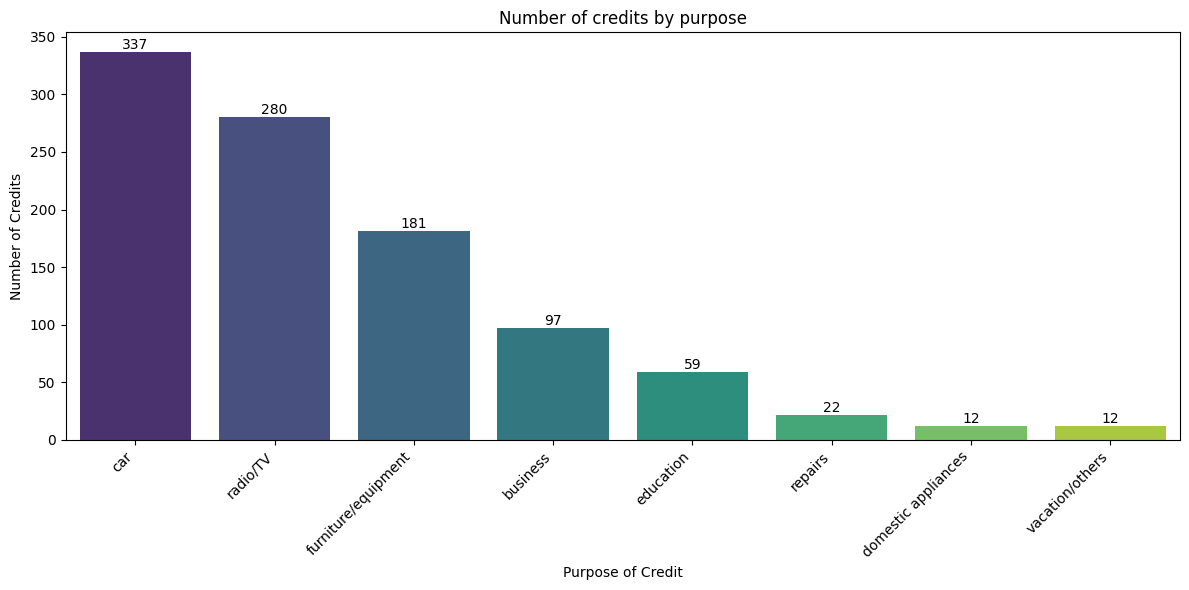

In [88]:
# Create a figure and a set of subplots
plt.figure(figsize=(12, 6))

# Generate a bar plot using sns.barplot()
sns.barplot(x=tipo_monto_credito.index, y='Cantidad de creditos', data=tipo_monto_credito, hue=tipo_monto_credito.index, palette='viridis', legend=False)

# Set labels and title
plt.xlabel('Purpose of Credit')
plt.ylabel('Number of Credits')
plt.title('Number of credits by purpose')

# Rotate x-axis labels if they overlap to ensure readability
plt.xticks(rotation=45, ha='right') # ha='right' aligns the rotated labels nicely

# Add data labels on top of the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

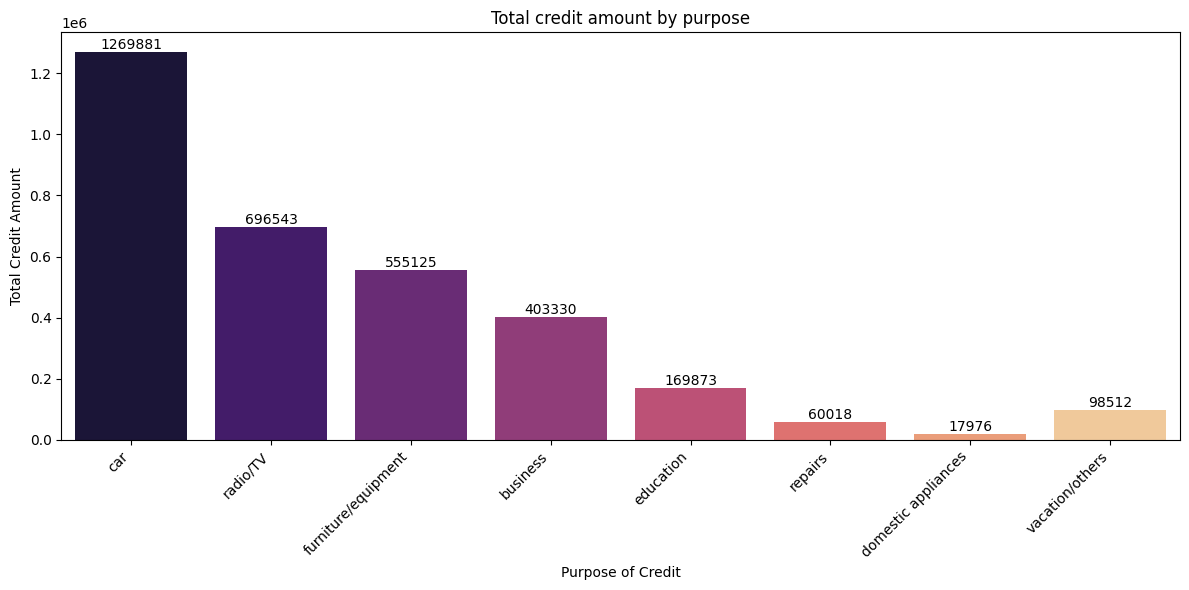

In [89]:
# Create a figure and a set of subplots
plt.figure(figsize=(12, 6))

# Generate a bar plot using sns.barplot()
sns.barplot(x=tipo_monto_credito.index, y='Total monto de credito', data=tipo_monto_credito, hue=tipo_monto_credito.index, palette='magma', legend=False)

# Set labels and title
plt.xlabel('Purpose of Credit')
plt.ylabel('Total Credit Amount')
plt.title('Total credit amount by purpose')

# Rotate x-axis labels if they overlap to ensure readability
plt.xticks(rotation=45, ha='right') # ha='right' aligns the rotated labels nicely

# Add data labels on top of the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

### Demographic distribution Based on Sex


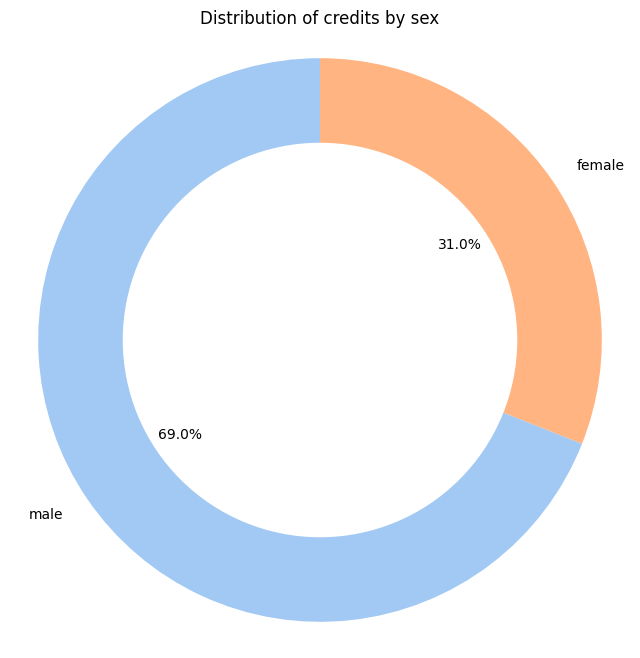

In [68]:
# Create a figure and a set of subplots
plt.figure(figsize=(8, 8))

# Generate a pie chart
plt.pie(df_1.values,
        labels=df_1.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel')[0:len(df_1)]) # Use a pastel color palette

# Add a circle for a donut-like effect (optional, mimicking plotly's hole)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Set title
plt.title('Distribution of credits by sex')

# Display the plot
plt.show()

### Credist Risk Distribiution

In [69]:
# Number of good and bad credits
df['Risk'].value_counts().sort_values(ascending=False)

,count
Risk,
good,700
bad,300


### Demographic Distribution by Clients Age

In [70]:
# Distribution of ages
edad = df['Age']

# Column statistics
edad.describe()

,Age
count,1000.000000
mean,35.546000
std,11.375469
min,19.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,75.000000


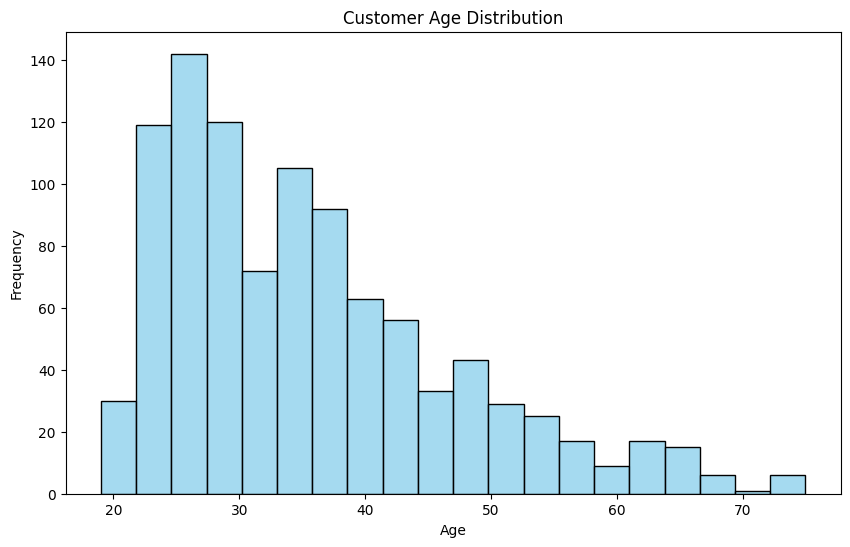

In [71]:
# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Generate a histogram using sns.histplot()
sns.histplot(df['Age'], bins=20, kde=False, color='skyblue')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Customer Age Distribution')

# Display the plot
plt.show()

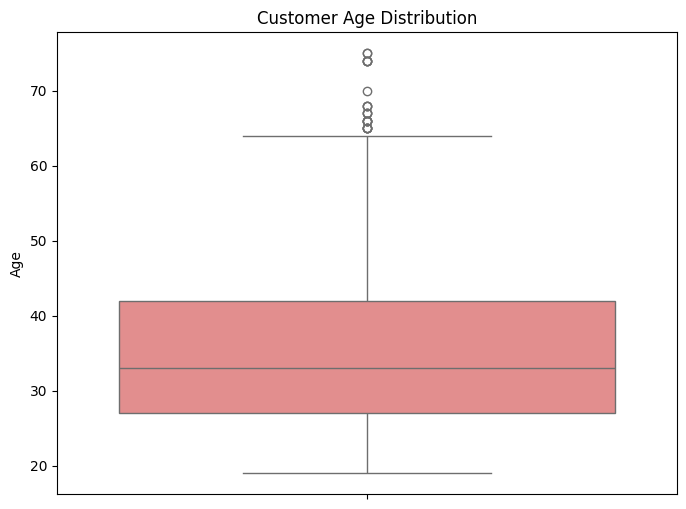

In [72]:
# Create a figure and a set of subplots
plt.figure(figsize=(8, 6))

# Generate a boxplot using sns.boxplot()
sns.boxplot(y=df['Age'], color='lightcoral')

# Set labels and title
plt.ylabel('Age')
plt.title('Customer Age Distribution')

# Display the plot
plt.show()

### Types of Debtors by Housing

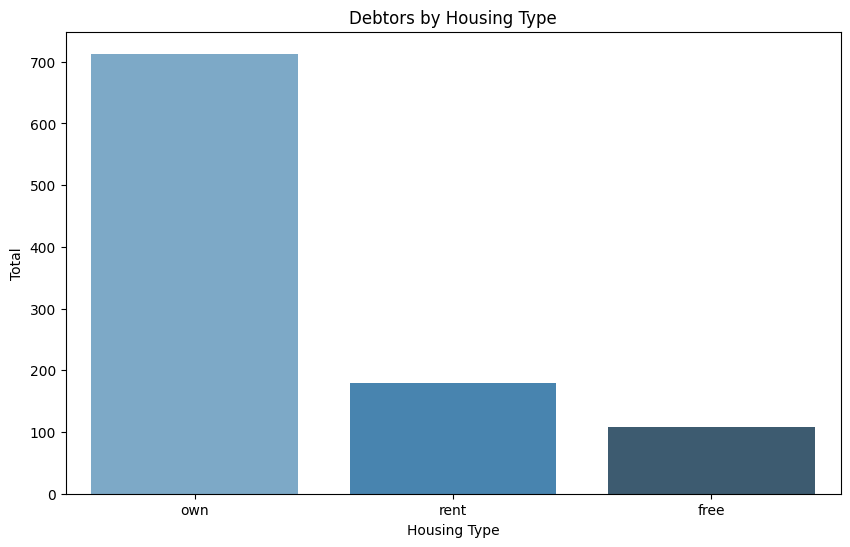

In [73]:
# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Generate a bar plot using sns.barplot()
sns.barplot(x=deudores_housing.index, y=deudores_housing.values, palette='Blues_d', hue=deudores_housing.index, legend=False)

# Set labels and title
plt.xlabel('Housing Type')
plt.ylabel('Total')
plt.title('Debtors by Housing Type')

# Display the plot
plt.show()

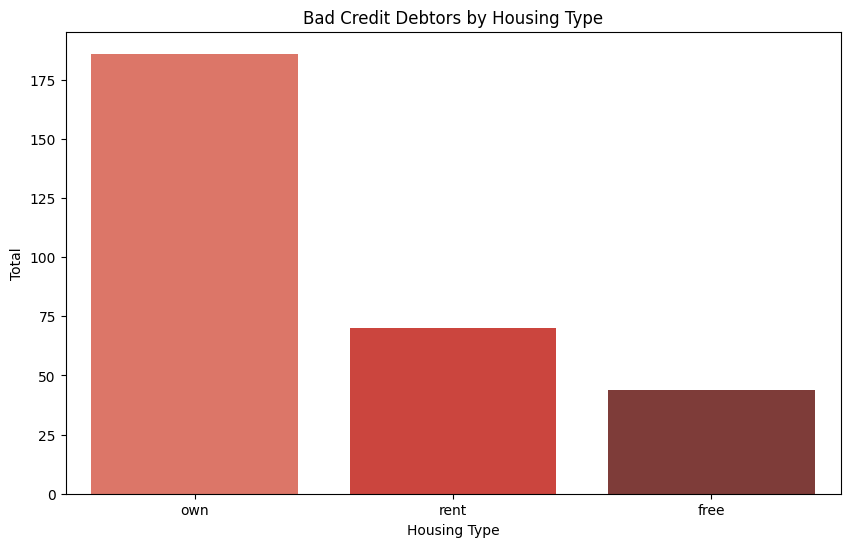

In [74]:
# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Generate a bar plot using sns.barplot()
sns.barplot(x=bad_credit_hosing.index, y=bad_credit_hosing.values, palette='Reds_d', hue=bad_credit_hosing.index, legend=False)

# Set labels and title
plt.xlabel('Housing Type')
plt.ylabel('Total')
plt.title('Bad Credit Debtors by Housing Type')

# Display the plot
plt.show()

### Credit Risk Distribution by Type and Purpose (good/bad)

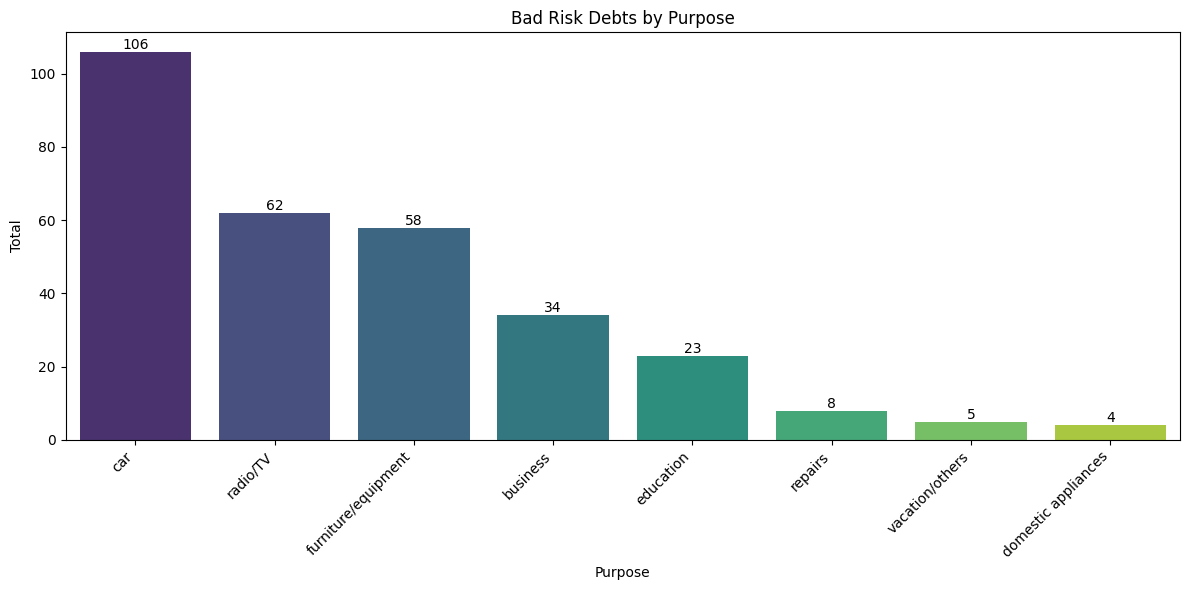

In [87]:
# Create a figure and a set of subplots
plt.figure(figsize=(12, 6))

# Generate a bar plot using sns.barplot()
sns.barplot(x=deudas_malas.index, y=deudas_malas.values, palette='viridis', hue=deudas_malas.index, legend=False)

# Set labels and title
plt.xlabel('Purpose')
plt.ylabel('Total')
plt.title('Bad Risk Debts by Purpose')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add data labels on top of the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

### Average Age of People with a Bad Credit for Car Purpose

In [76]:
# Average age for bad car credits
promedio_vehiculo = df[df['Risk'] == 'bad']['Age'][df['Purpose'] == 'car'].mean()

display(promedio_vehiculo)

np.float64(34.81132075471698)

### Overall Average Credit Duration

In [77]:
# Distribution of contract duration
duración = df['Duration']

# Column statistics
duración.describe()

,Duration
count,1000.000000
mean,20.903000
std,12.058814
min,4.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,72.000000


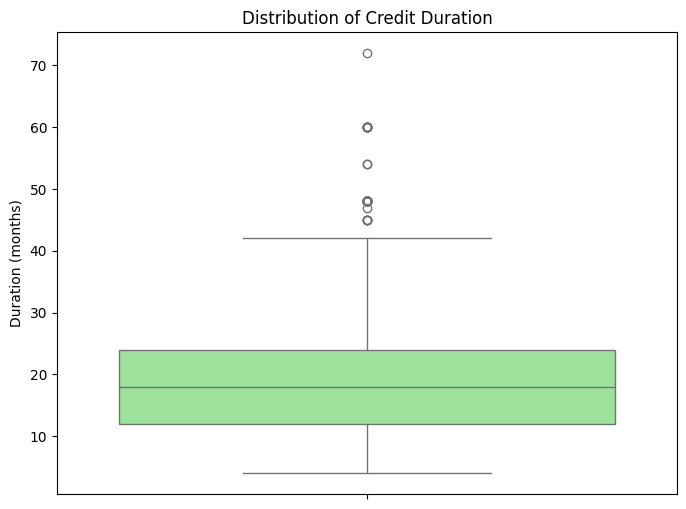

In [78]:
# Create a figure and a set of subplots
plt.figure(figsize=(8, 6))

# Generate a boxplot using sns.boxplot()
sns.boxplot(y=df['Duration'], color='lightgreen')

# Set labels and title
plt.ylabel('Duration (months)')
plt.title('Distribution of Credit Duration')

# Display the plot
plt.show()

### Average Duration of Good and Bad Credits

In [79]:
# Average duration of good credits
promedio_bueno = df[df['Risk'] == 'good']['Duration'].mean().round(2)
print(f'The duration of good credits is: {promedio_bueno} months')

# Average duration of bad credits
promedio_malo = df[df['Risk'] == 'bad']['Duration'].mean().round(2)

print(f'The duration of bad credits is: {promedio_malo} months')

The duration of good credits is: 19.21 months
The duration of bad credits is: 24.86 months


## Key EDA Findings

After the exploratory analysis, these are the findings from the data:

1. The dataset has a size of **1,000 rows** and **11 columns** with two index columns (pandas adds an index by default); the `Unamed: 0` column was removed.
2. This dataset groups the basic information of the clients such as age, job category, sex, housing, credit purpose, credit duration, credit risk category, and information about the accounts.
3. The columns contain data of both integer and text types.
4. There are two columns, `Savings accounts` and `Checking account`, that contain null data; this is of great relevance for the development of the project later on.
5. The dataset is distributed as **70% good credits** and **30% bad credits**.
6. **33.7%** of the credits are intended for the purchase of vehicles, followed by **28%** of credits for radio or television.
7. The sex distribution of the dataset is **69% men and 31% women**.
8. The majority of the credits have been granted to people between **27 to 42 years old**, with a median age of **33 years** and an average of **35.5 years**.
9. The average duration of credits in general is **21 months**; most are between **12 and 24 months**, and the one with the longest duration is **72 months**.
10. The average duration of good credits is **19 months**.
11. The average duration of bad credits is **25 months**.

---


# Part 2 Data preparation for AI model

Based on the findings discovered after the EDA, it is very important to make a decision for the creation of the AI model to categorize credits as `Good / Bad`, and for the prediction of the total credit amount. Therefore we will follow the next steps:

## 1. Data cleaning

To do this, I will replace the null fields in the `Savings accounts` and `Checking account` columns with other values; this decision is because we have a very small dataset for training an AI model, and if we remove the columns with null data, a model that provides the expected results would be obtained.

## 2. Data transformation

For data transformation, I will use a `data encoding` technique to convert the categorical variables in the 'Sex', 'Housing', 'Purpose', 'Saving accounts', and 'Checking account' columns into numerical formats that allow for better handling by the **Machine Learning** model. It is not necessary to convert the 'Job' column since it comes in numerical format by default.

## 3. Definition of variables

For the model, it's important to separate the dataset into two, splitting one with the independent variables (X) and the second into dependent risk variables for the risk classification model and the risk prediction model; for the latter, we will use a linear regression model.

## 4. Splitting data for training and testing

To test our model, I’m going to split both datasets using **80% for training and 20% for testing** in both models. The objective of this is to avoid having a bias in the evaluation of the classification and regression models.

## Data cleaning

To handle null data in the `Saving accounts` and `Checking accounts` columns, they were changed to **"no_account"**. And I will check again if the changes were made correctly to proceed with the next step.

Previously, the column `Unnamed: 0` had been deleted.


In [80]:
# Replace null values with "no_account" in the "Saving accounts" and "Checking account" columns
df['Saving accounts'] = df['Saving accounts'].fillna('no_account')
df['Checking account'] = df['Checking account'].fillna('no_account')

# View all unique values in the account columns
print(df['Saving accounts'].unique())
print(df['Checking account'].unique())

# Check for null values in the dataset
df.isnull().sum()

['no_account' 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' 'no_account' 'rich']


,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0
Risk,0


We can observe that the changes were made successfully and there are no more null values in the dataset.

## Data transformation

The next step is to apply the encoding technique to the 'Sex', 'Housing', 'Purpose', 'Saving accounts', and 'Checking account' columns. To do this, using Pandas .get_dummies() function; this function converts categorical text variables into numerical 1s and 0s, known as **One-hot encoding**.


In [81]:
# Convert categorical columns to numerical values
df_encoded = pd.get_dummies(df, columns=['Sex', 'Housing', 'Purpose', 'Saving accounts', 'Checking account'], drop_first=True)

# View the first 5 rows of the new dataset with the converted columns to verify changes
df_encoded.head()

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,...,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Saving accounts_moderate,Saving accounts_no_account,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_no_account,Checking account_rich
0,67,2,1169,6,good,True,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,22,2,5951,48,bad,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,49,1,2096,12,good,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,45,2,7882,42,good,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,53,2,4870,24,bad,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
# Verify the data types of the new columns
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1000 non-null   int64 
 1   Job                          1000 non-null   int64 
 2   Credit amount                1000 non-null   int64 
 3   Duration                     1000 non-null   int64 
 4   Risk                         1000 non-null   object
 5   Sex_male                     1000 non-null   bool  
 6   Housing_own                  1000 non-null   bool  
 7   Housing_rent                 1000 non-null   bool  
 8   Purpose_car                  1000 non-null   bool  
 9   Purpose_domestic appliances  1000 non-null   bool  
 10  Purpose_education            1000 non-null   bool  
 11  Purpose_furniture/equipment  1000 non-null   bool  
 12  Purpose_radio/TV             1000 non-null   bool  
 13  Purpose_repairs              1000 

We can see that the `pd.get_dummies()` function created new columns for each distinct variable in the categorical columns and the data types are boolean, which translates to numerical values 1 and 0.

## Definition of variables

Once we have converted the data into boolean or numerical format, we must separate the dependent and independent variables for each model, as well as split both datasets for testing and training using the 80/20 distribution.

For both classification and prediction models, the same independent variables will be used, and the two columns for `Risk` and `Credit amount` will be hidden.

The `train_test_split` module will be used; its function is to separate the dataset into two, for training and testing.


In [83]:
# Import necessary modules
from sklearn.model_selection import train_test_split

# Define target variables
y_classification = df_encoded['Risk']
y_regression = df_encoded['Credit amount']

# Define independent variables (features)
X = df_encoded.drop(columns=['Risk', 'Credit amount'])

# Split data for classification model
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Split data for regression model
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

print("Data split for classification:")
print(f"X_train_cls shape: {X_train_cls.shape}")
print(f"y_train_cls shape: {y_train_cls.shape}")
print(f"X_test_cls shape: {X_test_cls.shape}")
print(f"y_test_cls shape: {y_test_cls.shape}")

print("\nData split for regression:")
print(f"X_train_reg shape: {X_train_reg.shape}")
print(f"y_train_reg shape: {y_train_reg.shape}")
print(f"X_test_reg shape: {X_test_reg.shape}")
print(f"y_test_reg shape: {y_test_reg.shape}")

Data split for classification:
X_train_cls shape: (800, 20)
y_train_cls shape: (800,)
X_test_cls shape: (200, 20)
y_test_cls shape: (200,)

Data split for regression:
X_train_reg shape: (800, 20)
y_train_reg shape: (800,)
X_test_reg shape: (200, 20)
y_test_reg shape: (200,)


We can verify that both models have datasets with the correct distribution of 80% training and 20% testing.

# Part 3 Testing and results of the AI models

Once the data has been prepared, we can begin with the creation of both models. For this, the `RandomForestClassifier` module from the **sklearn** package will be used.

What the module does is one of the most powerful machine learning modules, which uses "decision trees" to train the model, then combines all the decisions to give the most accurate result.


## Credit categorization model

The prediction model, as I mentioned, uses the `RandomForestClassifier` module, which trains each node or subset randomly. The final prediction is determined by a majority vote of the subsets predicted by all the individual trees.


In [84]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
model_cls = RandomForestClassifier(random_state=42)

# Train the classification model
model_cls.fit(X_train_cls, y_train_cls)

# Make predictions on the test set
y_pred_cls = model_cls.predict(X_test_cls)

# Evaluate the classification model
print("Credit Risk Classification Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_cls):.2f}")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

Credit Risk Classification Model Performance:
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

         bad       0.59      0.41      0.48        59
        good       0.78      0.88      0.83       141

    accuracy                           0.74       200
   macro avg       0.68      0.64      0.65       200
weighted avg       0.72      0.74      0.72       200



Here are the first results from the **risk classification model**

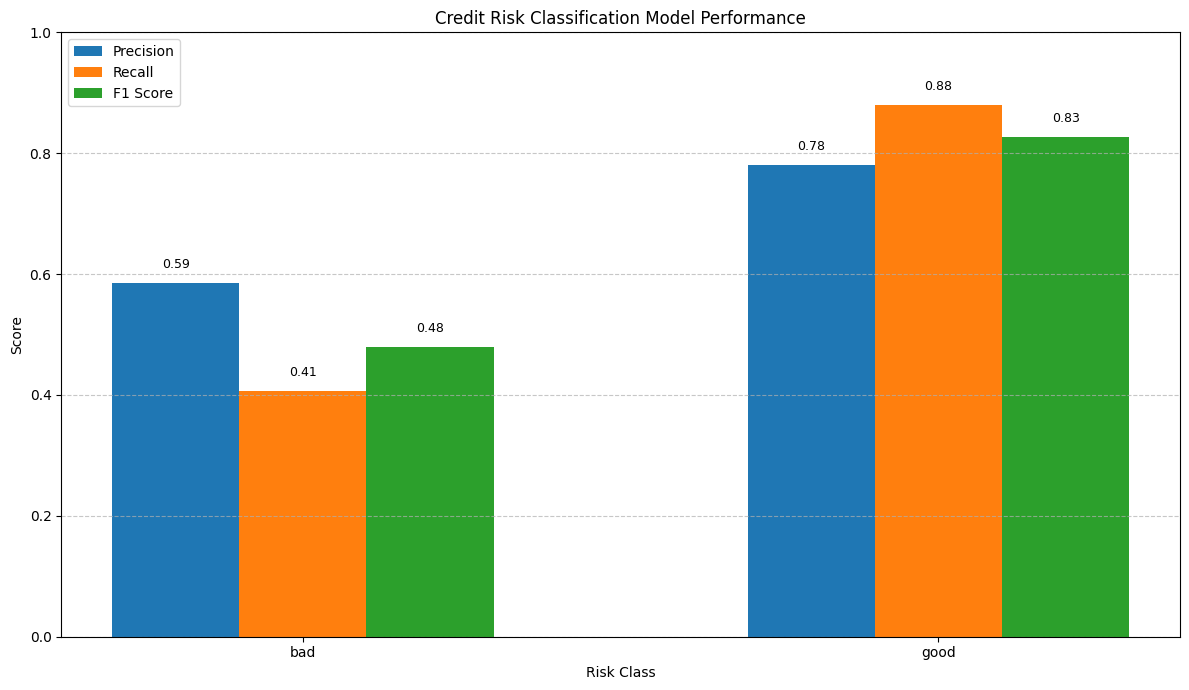

In [85]:
# Prepare data for plotting
metrics = ['precision', 'recall', 'f1-score']
classes = df_report.index.tolist()

x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(12, 7))

# Plotting each metric as a grouped bar chart
for i, metric in enumerate(metrics):
    values = df_report[metric].values
    plt.bar(x + i*width, values, width, label=metric.replace('-', ' ').title())

# Add labels, title, and customize x-axis
plt.xlabel('Risk Class')
plt.ylabel('Score')
plt.title('Credit Risk Classification Model Performance')
plt.xticks(x + width, classes) # Center x-ticks
plt.ylim(0, 1) # Set y-axis range from 0 to 1
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on top of the bars
for bar_group in plt.gca().containers:
    for bar in bar_group:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2),
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Credit amount prediction model

The prediction model uses the `RandomForestRegressor` module, which is used for models that use numerical or continuous values, as is the case with the credit amount. In the same way, it uses decision trees to cross-reference the results and obtain a more accurate one.

Unlike the credit categorization model, this one uses a linear regression model that seeks the relationship between a dependent variable and one or more independent variables through a straight line that best fits the data.

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
model_reg = RandomForestRegressor(random_state=42)

# Train the regression model
model_reg.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = model_reg.predict(X_test_reg)

# Evaluate the regression model
print("Credit Amount Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R-squared: {r2_score(y_test_reg, y_pred_reg):.2f}")

Credit Amount Prediction Model Performance:
Mean Squared Error: 4434602.82
R-squared: 0.27


## Results

* The null data were replaced correctly.
* The conversion to numerical data of the 'Sex', 'Housing', 'Purpose', 'Saving accounts', and 'Checking account' columns was performed correctly using the `pd.get_dummies()` function.
* For the **Credit risk rating** model, an accuracy value of **0.74** was obtained. The accuracy rating for identifying bad credits is **0.59**, and for good credits, it is **0.78**.
* Regarding the **Credit amount prediction** model, it had a mean squared error of 4,434,602.82, which indicates how close the line is to a set of values; the closer to zero, the higher the precision.

# Final Project Conclusions

The analysis and modeling performed on the bank’s credit dataset provided some insights into the institutional credit portfolio and the feasibility of automating risk assessment.

### 1. Key Analytical Insights (EDA)

The exploratory phase revealed that the bank’s credit distribution is heavily skewed toward **males (69%)** and purposes like **vehicle purchases and electronics**. The high concentration of "Good" credits (**70%**) created a baseline for the model but also introduced a challenge: the model became naturally better at identifying safe profiles than risky ones.

### 2. Classification Model Performance

The **Random Forest Classifier** achieved a solid overall accuracy of **0.74**.

* **The success:** The model is highly effective at identifying reliable borrowers (0.78 precision), which helps in maintaining customer satisfaction and quick approvals.

* **The challenge:** The precision for "Bad" credits (**0.59**) indicates that the model still struggles to catch roughly 40% of risky loans. In a real-world banking scenario, this "False Positive" rate is where the most financial loss occurs.

### 3. Regression Model Limitations

The **Random Forest Regressor** used to predict `Credit amount` showed a high Mean Squared Error. This suggests that the requested loan amount is not strictly dependent on the demographic variables available (age, housing, etc.), but likely depends on external factors like personal income or specific collateral that were not present in this dataset.

---

### Future Considerations

In order to solve  the bank's delinquency problem, I recommend the following next steps:

* **Address Data Imbalance:** Use techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) to balance the ratio of good and bad credits during training to improve the detection of risky borrowers.
* **Feature Engineering:** Incorporate additional financial variables, such as "Debt-to-Income Ratio" or "Credit History Length," to provide the regression model with better predictive power for loan amounts.
* **Hybrid Implementation:** Use the AI model as a **first-tier filter** to flag high-risk applications for manual review by senior analysts, while auto-approving high-scoring "Good" credits to improve operational efficiency.
